In [3]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beaac\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beaac\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\beaac\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


In [5]:
# Import txt file

with open('key_events_20th_century.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [7]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Historic events in the 20th century[edit] World at the beginning of the century[edit] Main article: Edwardian era The new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', '1914 saw the completion of the Panama Canal.', 'The Scramble for Africa continued in the 1900s and resulted in wars and genocide across the continent.', 'The atrocities in the Congo Free State shocked the uncolonised world.', 'From 1914 to 1918, the First World War, and its aftermath, caused major changes i

In [9]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'era', 'The', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 'a', 'series', 'of', 'inventions', ',', 'including', 'the

In [11]:
#Frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

<FreqDist with 4721 samples and 21901 outcomes>


In [15]:
# 10 most common words
dist_words.most_common(10)


[('.', 1626),
 ('the', 1116),
 (',', 975),
 ('of', 612),
 ('and', 408),
 ('to', 325),
 ('The', 319),
 ('[', 309),
 (']', 309),
 ('in', 298)]

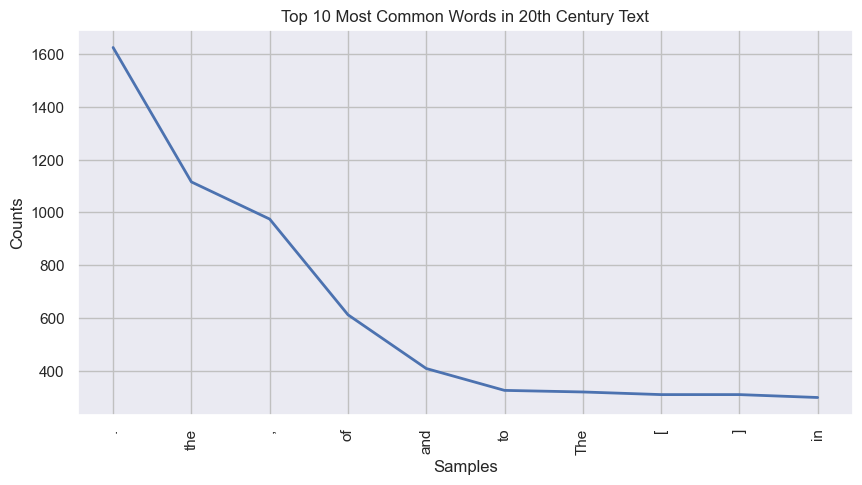

In [17]:
# Plot the bar chart
plt.figure(figsize=(10, 5))
dist_words.plot(10, title="Top 10 Most Common Words in 20th Century Text")
plt.show()

In [28]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{"weren't", 'very', 'he', 'been', 'm', "you're", 'as', 're', 'some', 'will', 'into', 'you', 'them', "wouldn't", 'of', 'whom', 'these', "we're", 'any', 'am', 'which', 'the', "don't", 'if', 'mustn', 'those', 'down', 'or', 'i', 'we', 'more', 'but', 'then', 'her', 'further', "i'd", 'there', "hadn't", 'mightn', "she'll", 'own', "we'll", 'now', 'should', 'yours', 'have', 'nor', "she'd", 'itself', "i've", 'do', 'shan', "aren't", 'haven', "it'll", 'are', 'himself', "haven't", 'for', 'wasn', 'in', "you'll", 'myself', "i'll", "they'd", 'off', 'while', 'ourselves', 'did', 'his', 'only', 'between', 'she', 'each', 'because', "we'd", 'didn', 'hers', 'weren', 'won', 'ours', 'below', 'just', "it's", 'your', 'yourself', 'such', 'being', 'wouldn', 'to', 'their', 'needn', 'ain', 'so', 'an', 'other', 'than', 'that', 'does', "couldn't", 't', 'when', 'hadn', 'shouldn', 'until', "he'll", 's', "mustn't", 'up', 'what', 'again', 'once', "didn't", 'y', 'same', "he'd", 'above', 'on', "wasn't", 'before', 'too', 'b

In [30]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
      if word not in stop_words:
           filtered_words.append(word)

In [35]:
filtered_words

['The',
 '20th',
 'century',
 'changed',
 'world',
 'unprecedented',
 'ways',
 '.',
 'The',
 'World',
 'Wars',
 'sparked',
 'tension',
 'countries',
 'led',
 'creation',
 'atomic',
 'bombs',
 ',',
 'Cold',
 'War',
 'led',
 'Space',
 'Race',
 'creation',
 'space-based',
 'rockets',
 ',',
 'World',
 'Wide',
 'Web',
 'created',
 '.',
 'These',
 'advancements',
 'played',
 'significant',
 'role',
 'citizens',
 "'",
 'lives',
 'shaped',
 '21st',
 'century',
 'today',
 '.',
 'Historic',
 'events',
 '20th',
 'century',
 '[',
 'edit',
 ']',
 'World',
 'beginning',
 'century',
 '[',
 'edit',
 ']',
 'Main',
 'article',
 ':',
 'Edwardian',
 'era',
 'The',
 'new',
 'beginning',
 '20th',
 'century',
 'marked',
 'significant',
 'changes',
 '.',
 'The',
 '1900s',
 'saw',
 'decade',
 'herald',
 'series',
 'inventions',
 ',',
 'including',
 'automobile',
 ',',
 'airplane',
 'radio',
 'broadcasting',
 '.',
 '1914',
 'saw',
 'completion',
 'Panama',
 'Canal',
 '.',
 'The',
 'Scramble',
 'Africa',
 'conti

In [38]:
# Create a new FreqDist for filtered_words

dist_words_filter = FreqDist(filtered_words)
print(dist_words_filter)

<FreqDist with 4618 samples and 17186 outcomes>


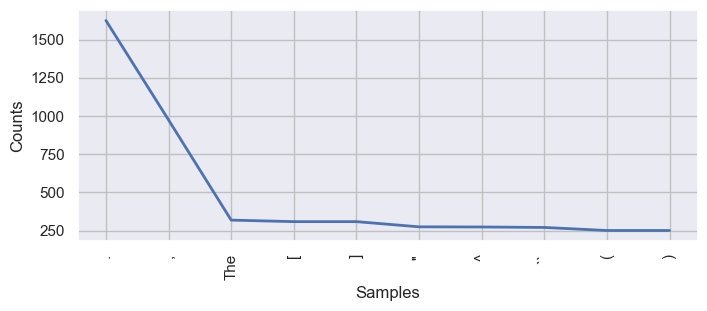

In [41]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter.plot(10, cumulative = False)
plt.show()

The most common strings in the text sample are mainly punctuation marks as well as "The". I will have to remove common puctuation marks.

In [48]:
dist_words_filter

FreqDist({'.': 1626, ',': 975, 'The': 319, '[': 309, ']': 309, "''": 275, '^': 274, '``': 271, '(': 251, ')': 251, ...})

In [51]:
# Substitute all punctuations marks with a space 

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(filtered_words))

In [54]:
sans_punc

'  The      th    century    changed    world    unprecedented    ways         The    World    Wars    sparked    tension    countries    led    creation    atomic    bombs         Cold    War    led    Space    Race    creation    space based    rockets         World    Wide    Web    created         These    advancements    played    significant    role    citizens         lives    shaped      st    century    today         Historic    events      th    century         edit         World    beginning    century         edit         Main    article         Edwardian    era    The    new    beginning      th    century    marked    significant    changes         The        s    saw    decade    herald    series    inventions         including    automobile         airplane    radio    broadcasting                 saw    completion    Panama    Canal         The    Scramble    Africa    continued        s    resulted    wars    genocide    across    continent         The    atrocities  

In [57]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print(tokenized_word_2)

['The', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'The', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'saw', 'completion', 'Panama', 'Canal', 'The', 'Scramble', 'Africa', 'continued', 's', 'resulted', 'wars', 'genocide', 'across', 'continent', 'The', 'atrocities', 'Congo', 'Free', 'State', 'shocked', 'uncolonised', 'world', 'From', 'First', 'World', 'War', 'aftermath',

In [61]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)

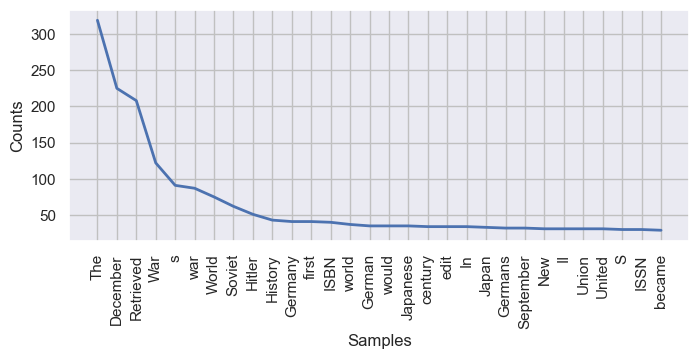

In [64]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(30, cumulative = False)
plt.show()

In [68]:
dist_words_filter_2.most_common(20)

[('The', 319),
 ('December', 225),
 ('Retrieved', 208),
 ('War', 122),
 ('s', 91),
 ('war', 87),
 ('World', 75),
 ('Soviet', 62),
 ('Hitler', 51),
 ('History', 43),
 ('Germany', 41),
 ('first', 41),
 ('ISBN', 40),
 ('world', 37),
 ('German', 35),
 ('would', 35),
 ('Japanese', 35),
 ('century', 34),
 ('edit', 34),
 ('In', 34)]

POS Tags with TextBlob

In [74]:
new_stopwords = [ "The", 'In', 'S', 's']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [77]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 5.56 ms


In [80]:
text

TextBlob("['th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'saw', 'completion', 'Panama', 'Canal', 'Scramble', 'Africa', 'continued', 'resulted', 'wars', 'genocide', 'across', 'continent', 'atrocities', 'Congo', 'Free', 'State', 'shocked', 'uncolonised', 'world', 'From', 'First', 'World', 'War', 'aftermath', 'caused', 'major', 'changes', 'power', 'b

In [87]:
tags_list = text.tags

In [90]:
tags_list

[('[', 'JJ'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'changed", 'VBD'),
 ("'world", 'NNP'),
 ("'", 'POS'),
 ("'unprecedented", 'VBD'),
 ("'ways", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wars", 'NNS'),
 ("'", 'POS'),
 ("'sparked", 'VBD'),
 ("'tension", 'NNP'),
 ("'", 'POS'),
 ("'countries", 'NNS'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'creation", 'NNP'),
 ("'", 'POS'),
 ("'atomic", 'NNP'),
 ("'", 'POS'),
 ("'War", 'NNP'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'Space", 'NNP'),
 ("'", 'POS'),
 ("'Race", 'NNP'),
 ("'", 'POS'),
 ("'creation", 'NN'),
 ("'space", 'NNP'),
 ("'", 'POS'),
 ("'based", 'VBD'),
 ("'rockets", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wide", 'NNP'),
 ("'", 'POS'),
 ("'Web", 'NNP'),
 ("'", 'POS'),
 ("'created", 'VBD'),
 ("'These", 'JJ'),
 ("'advancements", 'NNS'),
 ("'", 'POS'),
 ("'significant", 'NNP'),
 ("'", 'POS'),
 ("'role", 'NNP'),
 ("'", 'POS'),
 ("'citizens", 'NNS'),
 ("'", 'POS'),
 ("'liv

In [93]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [96]:
df_text.head()

,Words,Word type
0,[,JJ
1,'th,NNP
2,',POS
3,'century,NNP
4,',POS


In [101]:
df_t = df_text.groupby('Word type').count().reset_index()

In [104]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,76
2,DT,12
3,EX,13
4,FW,42


In [109]:
top10 = df_t.nlargest(10, 'Words')

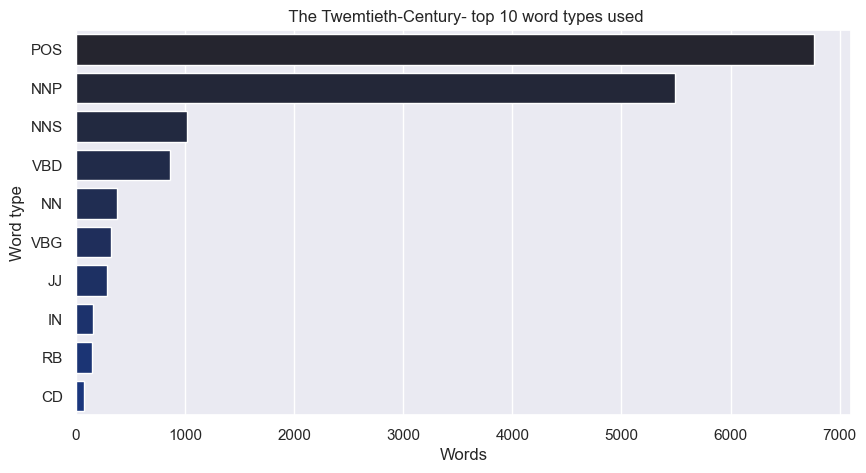

In [115]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top10).set_title(" The Twemtieth-Century- top 10 word types used")

Create 3 bar plots with the top 15 POS labels

NOUNS


In [129]:
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [131]:
top15

,Word,Occurences
289,'December,225
1262,'War,122
2554,'war,87
1305,'World,75
1111,'Soviet,62
539,'Hitler,51
538,'History,43
1764,'first,41
562,'ISBN,40
2580,'world,37


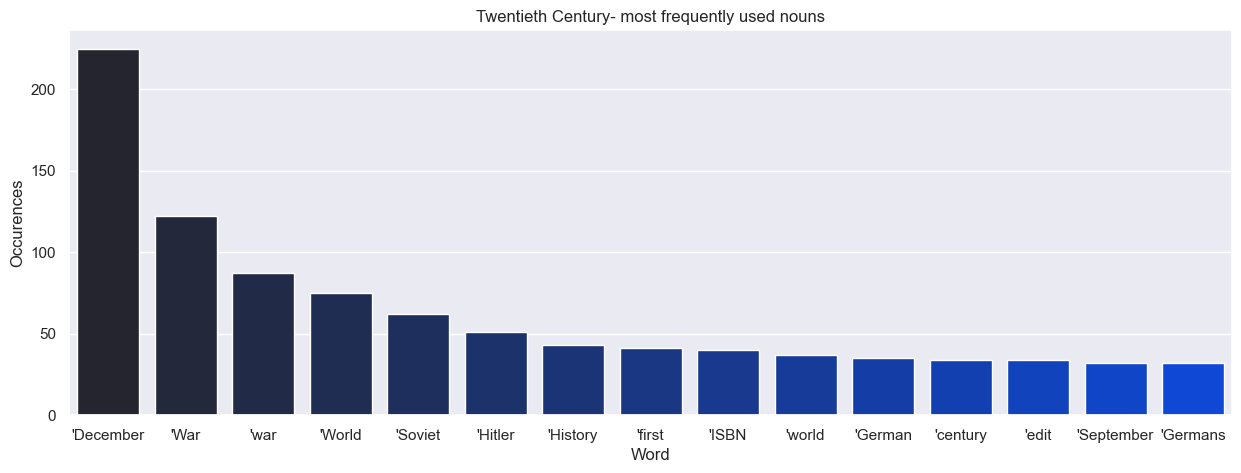

In [138]:
plt.figure(figsize=(15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top15).set_title("Twentieth Century- most frequently used nouns")



Verbs

In [143]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [145]:
top15

,Word,Occurences
27,'Retrieved,208
36,'United,31
0,'Allied,18
194,'led,15
1,'Archived,14
319,'used,13
192,'launched,12
92,'controlled,9
158,'forced,8
310,'turned,7


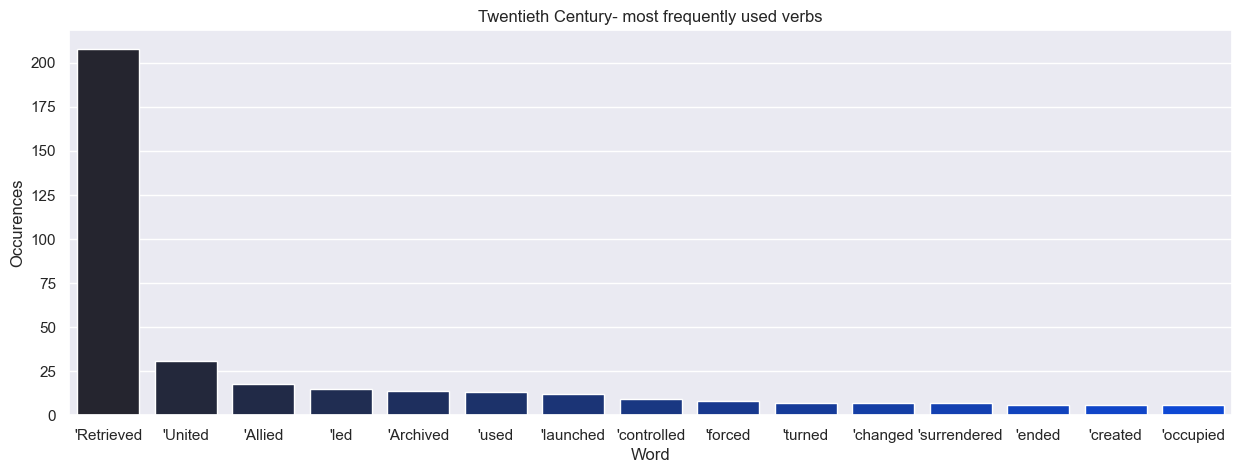

In [148]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("Twentieth Century- most frequently used verbs")

Adjectives

In [155]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top15 = y.nlargest(15, 'Occurences')

In [157]:
top15

,Word,Occurences
27,'Japanese,35
2,'American,24
5,'Atlantic,13
19,'Guardian,10
13,'Chinese,7
104,'political,6
41,'Russian,6
1,'African,6
7,'Baltic,5
105,'possible,5


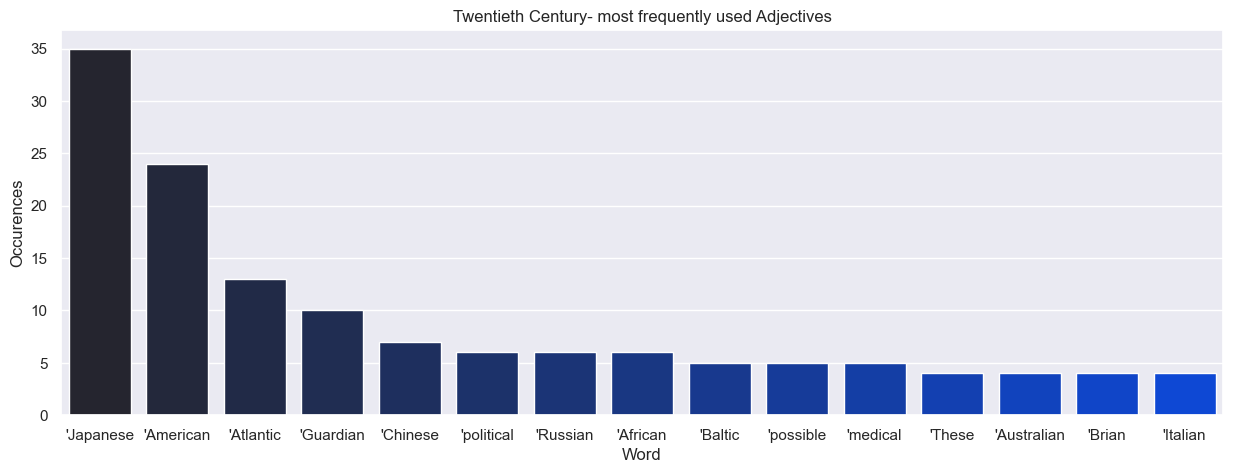

In [162]:
plt.figure(figsize = (15, 5))
with sns.dark_palette("xkcd:blue", 15):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top15).set_title("Twentieth Century- most frequently used Adjectives")

Import Country list

In [271]:
df_countries= pd.read_csv(r"C:\Users\beaac\Desktop\20 Century\countries_list_20th_century_1.5 (1).csv")

In [273]:
 #Strip whitespace and convert to lowercase
df_countries["country_name"] = df_countries["country_name"].apply(lambda x: str(x).strip().lower())

In [275]:
# Convert to list
country_list = df_countries["country_name"].tolist()

In [279]:
listToStr = ' '.join([str(word) for word in filtered])


In [281]:
all_counts = Counter(re.sub(r'\W+', ' ', listToStr).lower().split())


In [299]:
# Define aliases
country_aliases = {
    "us": "united states",
    "u.s.": "united states",
    "usa": "united states",
    "ussr": "russia",
    "soviet union": "russia",
    "uk": "united kingdom",
    "britain": "united kingdom",
    
}

In [301]:
# Combine original countries and aliases
all_country_terms = country_list + list(country_aliases.keys())

In [305]:
country_mentions = {}

for term in all_country_terms:
    count = all_counts.get(term, 0)
    canonical_name = country_aliases.get(term, term)
    country_mentions[canonical_name] = country_mentions.get(canonical_name, 0) + count


In [307]:
df_mentions = pd.DataFrame(list(country_mentions.items()), columns=["Country", "Mentions"])
df_mentions = df_mentions[df_mentions["Mentions"] > 0].sort_values("Mentions", ascending=False).reset_index(drop=True)


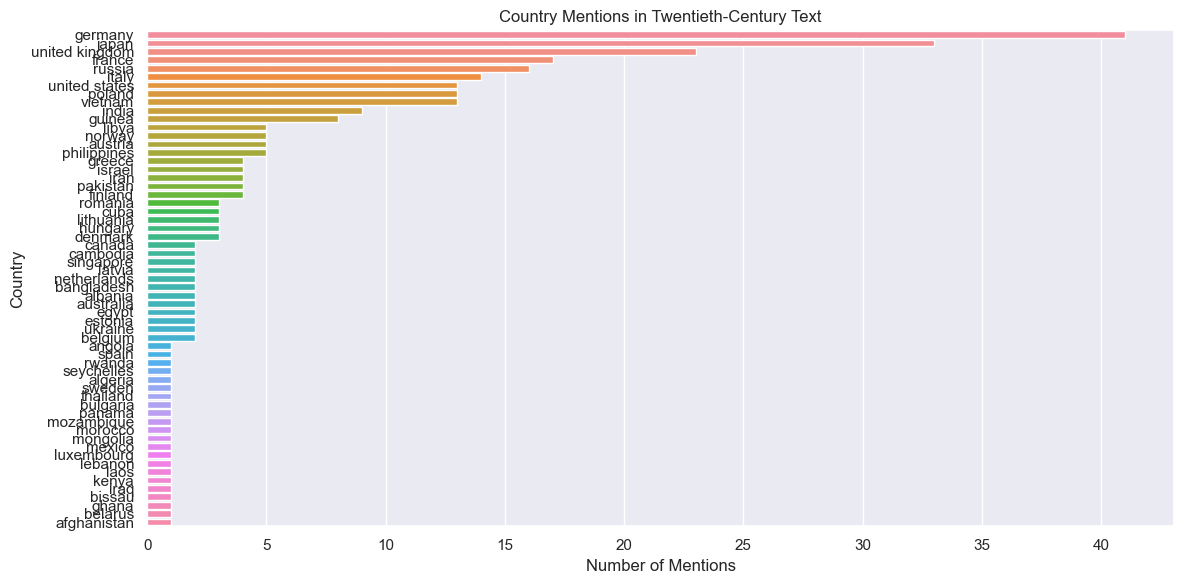

In [309]:
sns.set_palette(sns.dark_palette("#79C", 27))
plt.figure(figsize=(12, 6))
sns.barplot(x="Mentions", y="Country", data=df_mentions, saturation=0.9)
plt.title("Country Mentions in Twentieth-Century Text")
plt.xlabel("Number of Mentions")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


Insights: The plot rveals a strong concentration of mentions around a key Countries like Germany, Japan, Uk, France, Russia, Italy and The US

The Frequency reflects the geopolitical dominance of these nations during the twentieth century, especially in context like the World Wras, The Cold War, and global diplomacy.Countries from Latin America, Africa, and smaller European nations appear less frequently.




*Bonus Task

Sentiment Analysis Expectations:
Polarity: -1 since is a text about mostly wars.
Subjectivity: 0 since the text shold be describing actuals facts.

In [316]:
text_sent = TextBlob(str(filtered))

In [319]:
print(text_sent.sentiment)

Sentiment(polarity=0.04937378178314091, subjectivity=0.3525051711919329)


Polarity: 0.049
Subjectivity:0.35
 The polarity score is slightly positive, suggesting that while text covers serious historical events, it may also include neutral language maybe referencing to peace treaties. The subectivity score is relativity low, indicating that the text leans toward factual events.

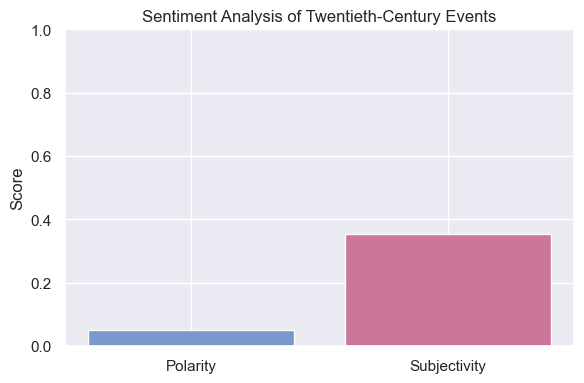

In [322]:

# Create a bar plot for polarity and subjectivity
plt.figure(figsize=(6, 4))
plt.bar(["Polarity", "Subjectivity"], [0.049, 0.353], color=["#79C", "#C79"])
plt.ylim(0, 1)
plt.title("Sentiment Analysis of Twentieth-Century Events")
plt.ylabel("Score")
plt.tight_layout()
plt.show()
